`Writing output to a file – Part 1`

- [Writing output to a file – Part 1](https://www.youtube.com/watch?v=a4VN2cC8o_8)

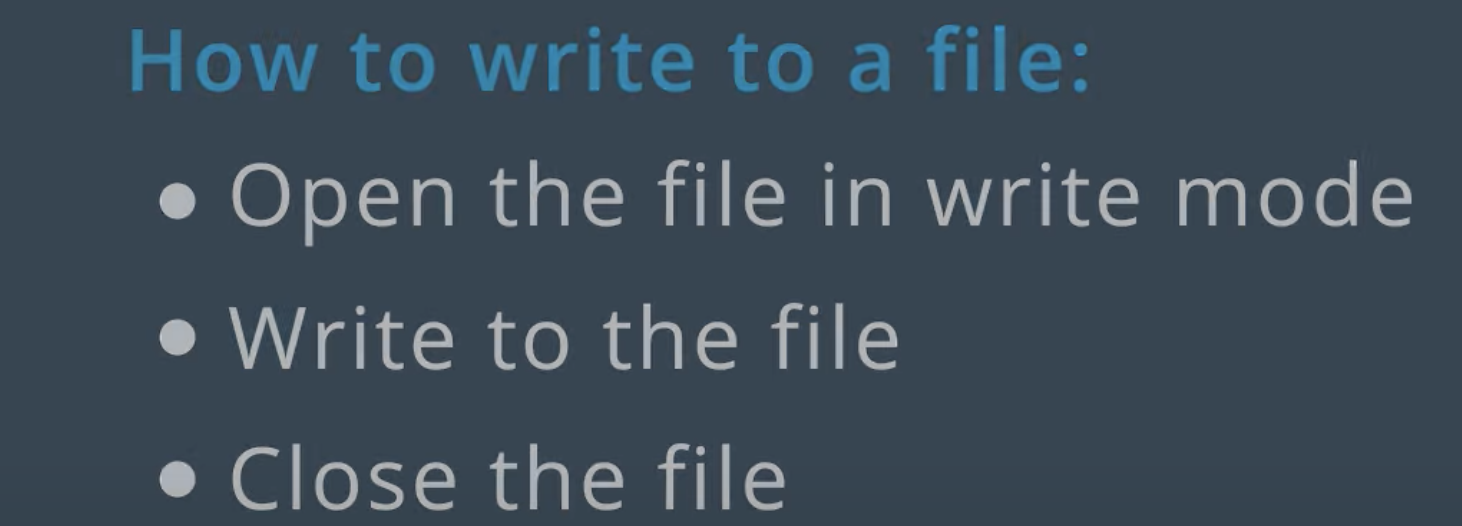

In [2]:
# Option-1
f = open("myfile.txt","w")
f.write("I'm writing this text to my new file.")
f.close()

In [3]:
# Option-2
with open("myfile.txt",'w') as f:
    f.write("I'm writing this text to my new file.")

In [4]:
new_file = open("new_file.txt", "w") # Create and open a new file in write mode
new_file.write("New content!") # Write to the file
new_file.close() # Close the file

new_file = open("new_file.txt", "r") # Open the file again, this time in read mode
contents = new_file.read() # Read the contents of the file
print(contents) # Print it out to check that it worked!

New content!


In [6]:
with open("new_file.txt", "w") as new_file: # Create and open new file
    new_file.write("New content!") # Write to the file

with open("new_file.txt", "r") as new_file: # Open the file again, this time in read mode
    contents = new_file.read()

print(contents)

New content!


`Writing output to a file – Part 2`

In [7]:
with open("old_file.txt","r") as rf:
    contents = rf.read()

with open("new_file.txt","w") as wf:
    wf.write(contents)

Here's one way to do it, in which we use a series of with statements and store the file contents in a couple of variables (old_content and new_content):

In [8]:
# Option-1
with open("old_file.txt") as old_file:
    old_content = old_file.read()

with open("new_file.txt", "w") as new_file:
    new_file.write(old_content)
    
with open("new_file.txt") as new_file:
    new_content = new_file.read()
    
print(new_content)

This is some text I'd like to copy into a new file!


If we like, we can actually avoide storing the contents in intermediate variables like old_content and new_content. Instead, we could nest our first two with statements and condense things like this:

In [11]:
# Option-2
with open("old_file.txt",'r') as old_file:
    with open("new_file.txt",'w') as new_file:
        new_file.write(old_file.read())

In [12]:
with open("new_file.txt") as new_file:
    new_content = new_file.read()
    
print(new_content)

This is some text I'd like to copy into a new file!


`Writing output to a file – Part 3`

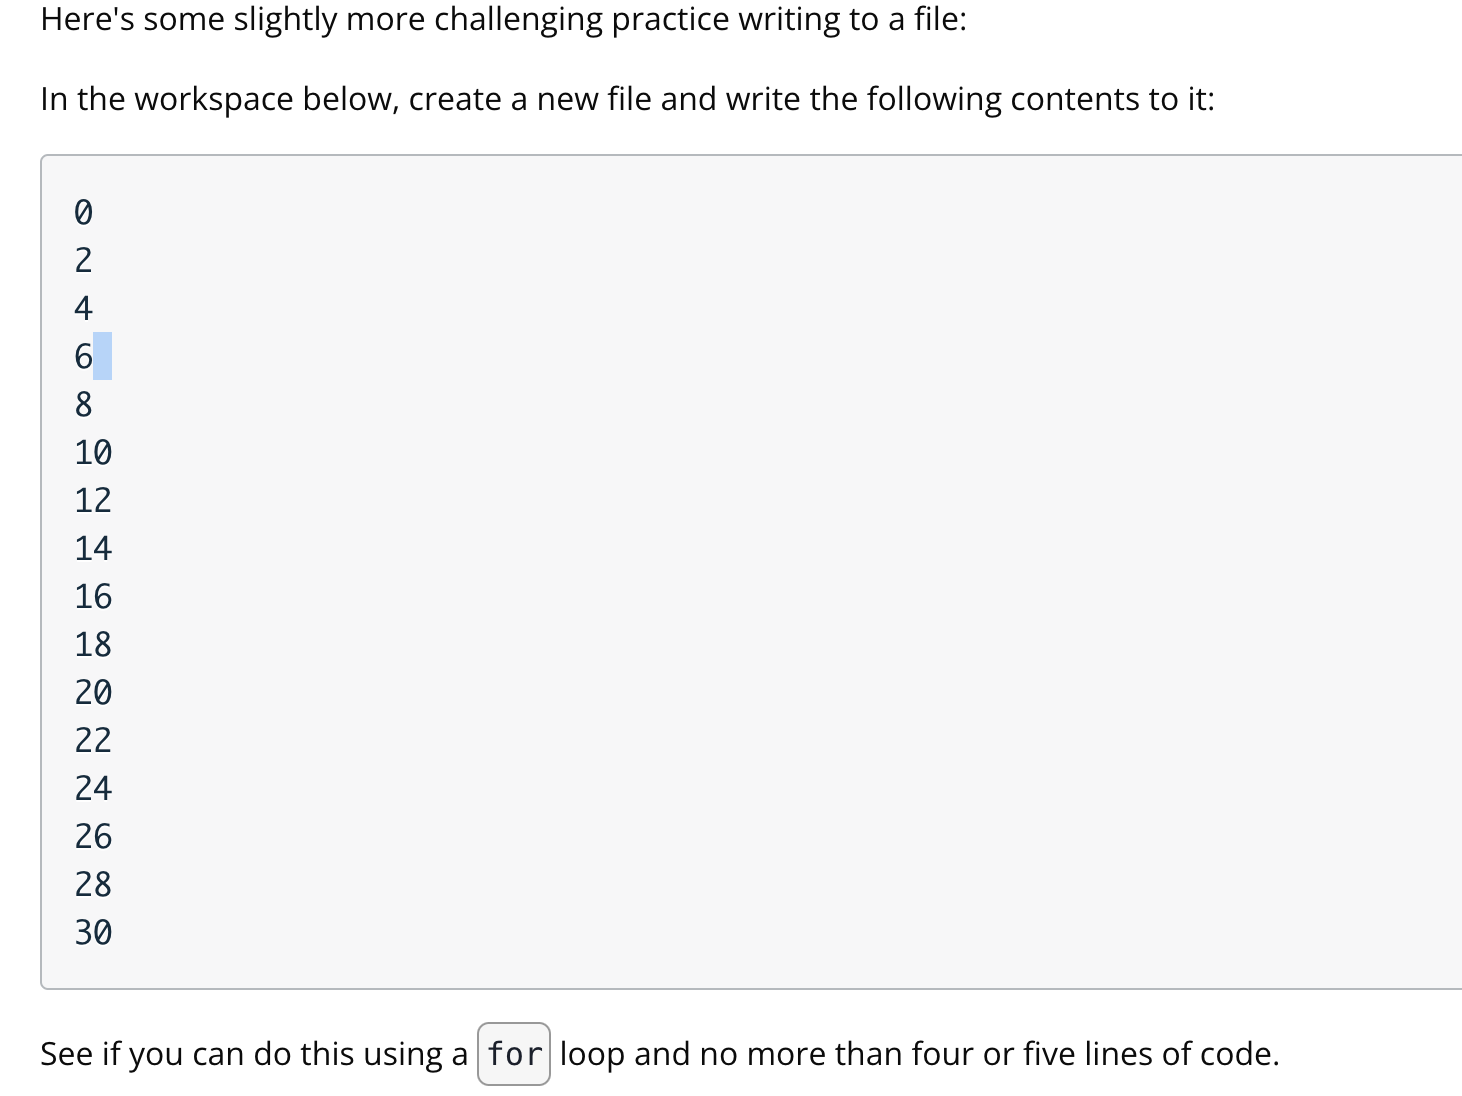

In [13]:
# Option-1
with open("new_loop_file.txt", "w") as wf:
    for num in range(31):
        if num % 2 == 0:
            wf.write(str(num))
            wf.write("\n")

In [17]:
# Option-2
# And actually, we can use an f-string to condense those last two lines to a single line:
with open("new_loop_file.txt", "w") as wf:
    for num in range(31):
        if num % 2 == 0:
            wf.write(str(f"{num}\n"))

`Writing output to a file – Part 4`

In [23]:
import string
test_words = ["crap", "darn!", "Heck!!!", "jerk...", "idiot?", "butt", "devil"]

for word in test_words:
    word = word.strip(string.punctuation)
    hash_word = word.replace(word,'*')*len(word)
    print(word, hash_word)
    

crap ****
darn ****
Heck ****
jerk ****
idiot *****
butt ****
devil *****


In [26]:
import string
test_words = ["crap", "darn!", "Heck!!!", "jerk...", "idiot?", "butt", "devil"]

def bleeper(word):
    pos = 0
    for character in word:
        if character not in string.punctuation:
            character = '*'
    
        word = word.replace(word[pos], character)
        pos += 1
    return word

In [27]:
for word in test_words:
    print(bleeper(word))

****
****!
****!!!
****...
*****?
****
*****


`Writing output to a file – Part 5`

In [28]:
import string
rude_words = ["crap", "darn", "heck", "jerk", "idiot", "butt", "devil"]

def check_line(line):
    rude_count = 0
    # We'll need the position of the current word in the list
    word_index = 0 
    words = line.split(" ")
    for word in words:
        # We need to check stripped words separately now
        stripped_word = word.strip(string.punctuation).lower() 
        if stripped_word in rude_words:
            rude_count += 1
            print(f"Found rude word: {word}")
            # Find the current word in the words list and replace it
            # with a bleeped version. Notice we use word rather than
            # stripped_word, in order to keep the punctuation.
            words[word_index] = bleeper(word)

        word_index += 1 # Moving on to the next word
    line = " ".join(words)
    # We now return both the count and the line itself, 
    # so we can write the line to a file
    return line, rude_count

def check_file(filename):
    with open(filename) as myfile:
        rude_count = 0
        # If the file has multiple lines, we will need
        # to collect them all for the final output
        lines = [] 
        for line in myfile:
            # Get the (potentially bleeped) line and 
            # the number of rude words in that line
            line, rude_subtotal = check_line(line)
            # Add to the total rude lines found in the file
            rude_count += rude_subtotal 
            # Add the current line to the lines list
            lines.append(line)

    if rude_count == 0:
        print("Congratulations, your file has no rude words.")
        print("At least, no rude words I know.")
    else:
      # If rude words were found, write them to a new file
      # and inform the user.
        with open("bleeped_copy.txt", "w") as bleeped_copy:
            bleeped_copy.write("\n".join(lines))         
        print(f"Found {rude_count} rude words in your file. See bleeped_copy.txt for a censored copy of your file.")
        
def bleeper(word):
    pos = 0 
    for character in word:
        if character not in string.punctuation:
            character = "*"
        word = word.replace(word[pos], character) 
        pos += 1
    return word

In [29]:
check_file("my_other_story.txt")

Found rude word: darn!
Found rude word: jerk.
Found rude word: Darn
Found rude word: Heck!
Found 4 rude words in your file. See bleeped_copy.txt for a censored copy of your file.
